# Introduction
Due in part to recent high-profile shootings of civilians by police in the US, the media and public have been scrutinizing police killings heavily. If you browse social media and news sites, you may get the sense that there's been a large uptick in civilian shootings by police in the US.

Each of the 467 rows in the dataset contains information on a police killing of a civilian in the US in from January 2015 to June 2015. There are many interesting columns in the dataset, but here are some of the more relevant ones:

name -- the name of the civilian.

age -- the age of the civilian.

gender -- the gender of the civilian.

raceethnicity -- the race and ethnicity of the civilian.

month, day, and year -- when the shooting occurred.

streetaddress, city, state -- where the shooting occurred.

lawenforcementagency -- the agency that was involved.

cause -- the cause of death.

armed -- whether or not the civilian was armed.

pop -- population of the census area where the incident occurred.

county_income -- median household income in the county.

For a full listing of the columns, look here :https://github.com/fivethirtyeight/data/tree/master/police-killings

Read more about the methodology used to gather the data here : 
http://fivethirtyeight.com/features/where-police-have-killed-americans-in-2015/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
police_killings = pd.read_csv('police_killings.csv', encoding='ISO-8859-1')
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [3]:
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

# Shootings By Race

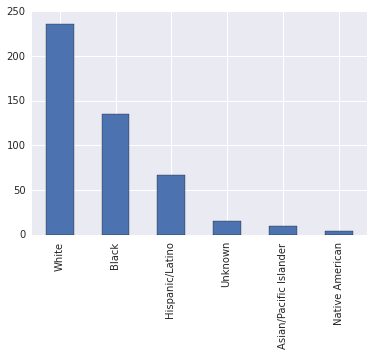

In [4]:
race_killings = police_killings['raceethnicity'].value_counts()
race_killings.plot(kind='bar')
plt.show()

In [5]:
race_percentage = pd.Series({'White': 63.7, 'Black': 12.2, 'Hispanic/Latino': 16.3, 'Asian/Pacific Islander': 4.9, 'Native American': 0.7, 'Unknown': 2.1})
race_percentage

Asian/Pacific Islander     4.9
Black                     12.2
Hispanic/Latino           16.3
Native American            0.7
Unknown                    2.1
White                     63.7
dtype: float64

In [6]:
race_combined = pd.DataFrame({'race_killings_percentage': 100*race_killings/race_killings.sum(), 'race_percentage': race_percentage})
race_combined

,race_killings_percentage,race_percentage
Asian/Pacific Islander,2.141328,4.9
Black,28.907923,12.2
Hispanic/Latino,14.346895,16.3
Native American,0.856531,0.7
Unknown,3.211991,2.1
White,50.535332,63.7


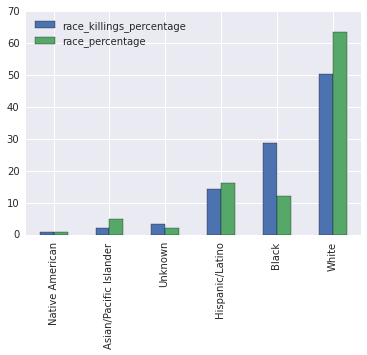

In [7]:
race_combined.sort_values("race_killings_percentage").plot(kind="bar")
plt.show()

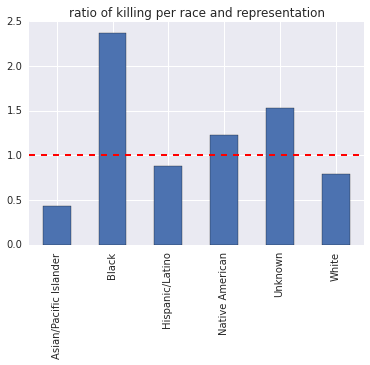

In [8]:
(race_combined["race_killings_percentage"]/race_combined["race_percentage"]).plot(kind="bar")
plt.axhline(1, color='r', linestyle='dashed', linewidth=2)
plt.title("ratio of killing per race and representation")
plt.show()

We can see that proportionaly, the black community is over represented in police killing.

# Shootings By Regional Income

In [9]:
income = police_killings[police_killings['p_income'] != '-']['p_income'].astype(int)
income.head()

0    28375
1    14678
2    25286
3    17194
4    33954
Name: p_income, dtype: int64

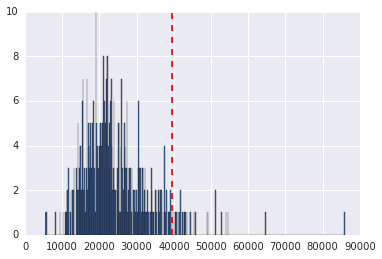

In [10]:
income.hist(bins=len(income))
#https://en.wikipedia.org/wiki/Personal_income_in_the_United_States#By_ethnicity_and_origin
median_us_income = 39509
plt.axvline(median_us_income,color ='r',linestyle="dashed")
plt.show()


# Shootings By State

In [11]:
state_pop = pd.read_csv('state_population.csv')
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [12]:
counts = police_killings['state_fp'].value_counts()
states = pd.DataFrame({'STATE': counts.index, 'shootings': counts})
states.head()

,STATE,shootings
6,6,74
48,48,47
12,12,29
4,4,25
40,40,22


In [13]:
states = states.merge(state_pop, on='STATE')
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4


In [14]:
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000
states['rate'] = states['shootings'] / states['pop_millions']

In [15]:
sorted_states = states.sort_values("rate")
sorted_states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898


We can see the state with the lowest state of shooting per million of habitant is Connecticut.

In [16]:
sorted_states.tail()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
39,2,2,40,4,9,Alaska,738432,552166,74.8,0.738432,2.708442
34,15,4,40,4,9,Hawaii,1431603,1120770,78.3,1.431603,2.794071
27,31,6,40,2,4,Nebraska,1896190,1425853,75.2,1.896190,3.164240
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065,3.661359
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338,5.624674


Likewise, we can see that the state with the highest shooting rate per million habitant is Oklahoma.

# State By State Differences

In [17]:
pk = police_killings[(police_killings['share_white'] != '-') & (police_killings['share_black'] != '-') & (police_killings['share_hispanic'] != '-')]

In [18]:
share = ["share_white", "share_black", "share_hispanic"]
pk[share] = pk[share].apply(pd.to_numeric)

/opt/dsserver/lib/python3.4/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [30]:
low_state = states["STATE"][-10:]
high_state = states["STATE"][10:]

In [35]:
top_ten = pk[pk['state_fp'].isin(high_state)]
low_ten = pk[pk['state_fp'].isin(low_state)]

In [36]:
top_ten[['pop', 'county_income', 'share_white', 'share_black', 'share_hispanic']].mean()

pop                4494.019512
county_income     51153.921951
share_white          60.652683
share_black          23.973171
share_hispanic        9.164878
dtype: float64

In [38]:
low_ten[['pop', 'county_income', 'share_white', 'share_black', 'share_hispanic']].mean()

pop                5031.866667
county_income     58328.000000
share_white          72.173333
share_black           9.306667
share_hispanic        7.073333
dtype: float64

At first glance we can see that the higher states has a lower percentage of black, but we cut all of the data where we didn't have information on one of of those tree, which may have bias the computation.